# Machine learning to predict molecule properties : solubility



Laurent Cetinsoy

The solubility of molecules is an important property in many applications like for drug selection or for compound selection for battery designes (no link to health).

Being able to predict the solubility of a molecule from its formula instead of having to make measuring experiment in an important aspect to enhanced fatester molecule discovery.

In this notebook we will do basic solubility prediction with machine learning models and rdkit


Install the python rdkit package with pip or conda

cf https://www.rdkit.org/docs/index.html

References :

- https://www.rdkit.org/docs/GettingStartedInPython.html
- https://www.rdkit.org/docs/Cookbook.html



# Atom and Molecule representations with Rdkit

Rdkit is a package allowing to work with molecule data and their representation. It is very useful to gather information about atom and molecules. Especially about their physical and chemical properties. In this notebook we will learn about them

For basic manipulations, the main submodule is **Chem**



### Smile representation

Smile lets represent molecules with text strings.


Like many representations in chemistry we do not represent hydrogene atoms, indeed we can deduce it from the rest of the data.


The following code define the Smile Representation of a very simple molecule. We will try to find out more

In [1]:
smile_molecule = "C"

From the rdkit.Chem submodule, import MolFromSmiles

Using MolFromSmiles, load smile_molecule into a rdkit molecule. Store it in a variable named first_mol

In [2]:
from rdkit import Chem
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors


In [3]:
first_mol = MolFromSmiles(smile_molecule)

display the type of first_mol

In [4]:
type(first_mol)

rdkit.Chem.rdchem.Mol

With the dir function, list the public methods of the object instance first_mol

In [5]:
public_methods = [method for method in dir(first_mol) if not method.startswith("_")]
public_methods

['AddConformer',
 'ClearComputedProps',
 'ClearProp',
 'Debug',
 'GetAromaticAtoms',
 'GetAtomWithIdx',
 'GetAtoms',
 'GetAtomsMatchingQuery',
 'GetBondBetweenAtoms',
 'GetBondWithIdx',
 'GetBonds',
 'GetBoolProp',
 'GetConformer',
 'GetConformers',
 'GetDoubleProp',
 'GetIntProp',
 'GetNumAtoms',
 'GetNumBonds',
 'GetNumConformers',
 'GetNumHeavyAtoms',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetRingInfo',
 'GetStereoGroups',
 'GetSubstructMatch',
 'GetSubstructMatches',
 'GetUnsignedProp',
 'HasProp',
 'HasQuery',
 'HasSubstructMatch',
 'NeedsUpdatePropertyCache',
 'RemoveAllConformers',
 'RemoveConformer',
 'SetBoolProp',
 'SetDoubleProp',
 'SetIntProp',
 'SetProp',
 'SetUnsignedProp',
 'ToBinary',
 'UpdatePropertyCache']

Among all the methods, you should have found a method allowing you to get the number of atoms.
Call it and store the result in a variable n_atoms and display it

In [6]:
n_atoms = first_mol.GetNumAtoms()
n_atoms

1

Using Draw from rdkit.Chem module, draw the moldule

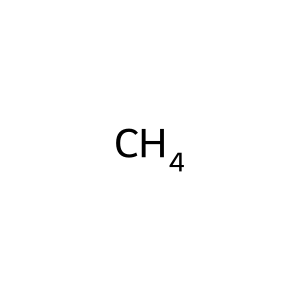

In [7]:
d = Draw.MolToImage(first_mol)
d

Do you see a contradiction between the MolToImage and GetNumOfAtoms ? Can you explain why below


We can notice that the GetNumAtoms function does not count implicit hydrogene atoms, while MolToImage include them in the representation. This is because it is not relevant to include the hydrogene atoms in the total count, since they are here only to assure the balance of atom links. 

We will tell rdkit to clone the molecule but to add the hydrogen atoms now.
Create a new molecule from first_mol using the method AddHs.
Store it in a variable named mol2

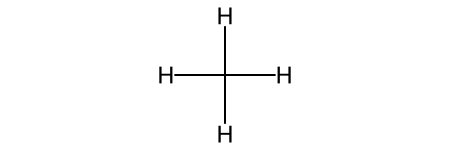

In [8]:
mol2 = Chem.AddHs(first_mol)
mol2

Display the number of Atoms now

In [9]:
n_atoms2 = mol2.GetNumAtoms()
n_atoms2

5

Display the number of Heavy Atoms (check the methods from dir output)

In [10]:
n_heavy_atoms = mol2.GetNumHeavyAtoms()
n_heavy_atoms

1

Is it coherent ?

Yes it is since the only relevant (here "heavy") atom is the carbon, hence the result 1.

With the MolToImage function of the Draw package, display the molecule mol2.

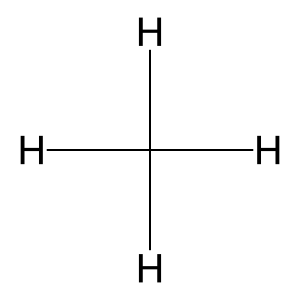

In [11]:
d2 = Draw.MolToImage(mol2)
d2

Let's look at a real molecule now.

The following string contains the SMILE representation of the paracetamol molecule

In [12]:
smile = 'CC(=O)NC1=CC=C(O)C=C1'

Using the MolFromSmiles function, create a molecule from the smile representation and print its types

In [13]:
mol = MolFromSmiles(smile)
type(mol)

rdkit.Chem.rdchem.Mol

With the MolToImage function of the Draw package, display the molecule

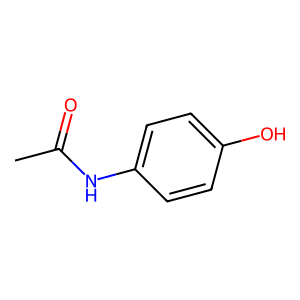

In [14]:
d3 = Draw.MolToImage(mol)
d3

You can get the Number of atoms of the molecules and the list of atoms with the methods GetNumAtoms and GetAtoms.

Print the number of atoms of the molecule

In [15]:
mol.GetNumAtoms()

11

In [16]:
mol_with_h = Chem.AddHs(mol)
mol_with_h.GetNumAtoms()

20

If you compare to the picture, you may see that the number of atoms is not 11. What is the total number and why rdkit do not give the same answer ?

The total number of atoms is 20 (which includes heavy atoms and "implicit" atoms). Rdkit does not give the same answer because it focuses on "explicit" atoms, which dictate the rest of the structure of the molecule and define its characteristics. Not counting the implicit atoms simplifies the process.

Print the list of each atoms

In [17]:
atoms = [atom.GetSymbol() for atom in mol.GetAtoms()]
atoms

['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'O', 'C', 'C']

Store the number of bonds of the molecule in **n_bond** (look which method can be used for that) and print

In [18]:
n_bond = mol.GetNumBonds()
n_bond

11

For each bond, print if the bond is single or double

In [19]:
for bond in mol.GetBonds():
    print(f"Bond between {bond.GetBeginAtom().GetSymbol()} and {bond.GetEndAtom().GetSymbol()} is {bond.GetBondType()}")

Bond between C and C is SINGLE
Bond between C and O is DOUBLE
Bond between C and N is SINGLE
Bond between N and C is SINGLE
Bond between C and C is AROMATIC
Bond between C and C is AROMATIC
Bond between C and C is AROMATIC
Bond between C and O is SINGLE
Bond between C and C is AROMATIC
Bond between C and C is AROMATIC
Bond between C and C is AROMATIC


### Reading molecule data from file

Apart SMILES, .SDF and .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf


Download this file and save it in a folder.



File saved as DB00295.sdf


SDF files can contain one or more molecules. To load them, you can use SDMolSupplier. When you use it it will return you an object that looks like a list.

Read the file that you've downloaded using "rdkit.Chem.SDMolSupplier" and get the first molecule (the only one) and  store it in a variable named **morphine**



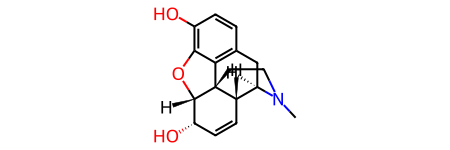

In [20]:
content = Chem.SDMolSupplier("notebook_1/DB00295.sdf")
morphine = content[0]

morphine

Display its type

In [21]:
type(morphine)

rdkit.Chem.rdchem.Mol

Display the picture of the molecule


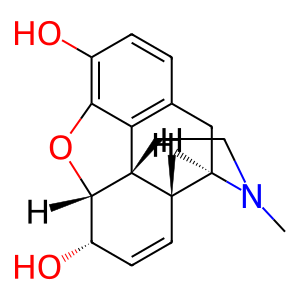

In [22]:
d4 = Draw.MolToImage(morphine)
d4

Display the number of atoms and the number of bonds

In [23]:
n_morphine_atoms = morphine.GetNumAtoms()
n_morphine_bonds = morphine.GetNumBonds()

print(f"Number of atoms: {n_morphine_atoms}, number of bonds: {n_morphine_bonds}")

Number of atoms: 21, number of bonds: 25


### Descriptors


Molecules are also described by a set of physiochemical descriptors like
- the log partition coefficient,
- the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.

The rdkit.Chem.Descriptors module and its sub module let us compute molecule descriptors.

the rdkit.Chem.Descriptors module has an attribute name \_descList, display it. It contains a list of tuple. Each tuple has the name of the physical property, and function associated to it to compute the given property

In [24]:
Descriptors._descList

[('MaxAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>),
 ('MaxEStateIndex',
  <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>),
 ('MinAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MinAbsEStateIndex(mol, force=1)>),
 ('MinEStateIndex',
  <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>),
 ('qed',
  <function rdkit.Chem.QED.qed(mol, w=QEDproperties(MW=0.66, ALOGP=0.46, HBA=0.05, HBD=0.61, PSA=0.06, ROTB=0.65, AROM=0.48, ALERTS=0.95), qedProperties=None)>),
 ('SPS', <function rdkit.Chem.SpacialScore.SPS(mol, normalize=True)>),
 ('MolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('HeavyAtomMolWt', <function rdkit.Chem.Descriptors.HeavyAtomMolWt(x)>),
 ('ExactMolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('NumValenceElectrons',
  <function rdkit.Chem.Descriptors.NumValenceElectrons(mol)>),
 ('NumRadicalElectrons',
  <function rdkit.Chem.Descriptors.NumRadicalElectrons(mol)>),
 ('Ma

Compute all descriptors in the _descList list of the paracetamol molecule using the MoleculeDescriptors.MolecularDescriptorCalculator class

In [25]:
def getAllDescriptors(m):
    res = dict()

    for attribute, fn in Descriptors._descList:
        res[attribute] = fn(m)

    return res
        

In [26]:
descriptors = getAllDescriptors(morphine)

Display the names and the fvalues of the descriptors

In [27]:
for attribute, value in descriptors.items():
    print(f"{attribute}: {value}")

MaxAbsEStateIndex: 10.440693027210884
MaxEStateIndex: 10.440693027210884
MinAbsEStateIndex: 0.1597222222222221
MinEStateIndex: -0.5943924792139084
qed: 0.7033474919154648
SPS: 42.57142857142857
MolWt: 285.34299999999996
HeavyAtomMolWt: 266.191
ExactMolWt: 285.136493468
NumValenceElectrons: 110
NumRadicalElectrons: 0
MaxPartialCharge: 0.1652428909596224
MinPartialCharge: -0.5042466595879944
MaxAbsPartialCharge: 0.5042466595879944
MinAbsPartialCharge: 0.1652428909596224
FpDensityMorgan1: 1.3333333333333333
FpDensityMorgan2: 2.1904761904761907
FpDensityMorgan3: 3.0476190476190474
BCUT2D_MWHI: 16.516853102099954
BCUT2D_MWLOW: 9.53113651260579
BCUT2D_CHGHI: 2.636111461135519
BCUT2D_CHGLO: -2.5601210424889
BCUT2D_LOGPHI: 2.617132894412904
BCUT2D_LOGPLOW: -2.6431440356017544
BCUT2D_MRHI: 5.612054247185539
BCUT2D_MRLOW: -0.04529371357624026
AvgIpc: 2.827160578068894
BalabanJ: 1.8445254467475667
BertzCT: 652.2473111288068
Chi0: 14.353006672199017
Chi0n: 11.990011574040388
Chi0v: 11.990011574040

### Fingerprinting


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.




In [28]:
import numpy as np
from rdkit.Chem import AllChem
from rdkit import DataStructs


With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [29]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(mol, 2)

[23:04:22] DEPRECATION WARNING: please use MorganGenerator


Display its type

In [30]:
type(fp1)

rdkit.DataStructs.cDataStructs.ExplicitBitVect

With the DataStructs module convert it to a numpy vector and display it shape and display it

In [31]:
fp1_np = np.zeros((1,), dtype=int)
DataStructs.ConvertToNumpyArray(fp1, fp1_np)

print(f"Shape: {fp1_np.shape}, array: {fp1_np}")

Shape: (2048,), array: [0 0 0 ... 0 0 0]


Create a function smiles_to_np_morganfingerprinting which takes a smile representation and gives back the numpy version of the morgan finger_printing

In [32]:
def smiles_to_np_morganfingerprinting(smile):
    m = MolFromSmiles(smile)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(m, 2)
    fingerprint_np = np.zeros((1,), dtype=int)
    
    DataStructs.ConvertToNumpyArray(fingerprint, fingerprint_np)

    return fingerprint_np    


Compute the morgan finger printing of the aspirin (CC(=O)OC1=CC=CC=C1C(O)=O) and paracetamol (CC(=O)NC1=CC=C(O)C=C1)

In [33]:
aspirin = "CC(=O)OC1=CC=CC=C1C(O)=O"
paracetamol = "CC(=O)NC1=CC=C(O)C=C1"

aspirin_fp = smiles_to_np_morganfingerprinting(aspirin)
paracetamol_fp = smiles_to_np_morganfingerprinting(paracetamol)

aspirin_fp


[23:04:22] DEPRECATION WARNING: please use MorganGenerator
[23:04:22] DEPRECATION WARNING: please use MorganGenerator


array([0, 0, 0, ..., 0, 0, 0])

Compute the DiceSimilarity of the two molecules

In [34]:
aspirin_bit = DataStructs.CreateFromBitString(''.join(map(str, aspirin_fp)))
paracetamol_bit = DataStructs.CreateFromBitString(''.join(map(str, paracetamol_fp)))

dice_similarity = DataStructs.DiceSimilarity(aspirin_bit, paracetamol_bit)

dice_similarity


0.36363636363636365